In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv('employee.csv')

In [7]:
df.describe()

,UNIQUE_ID,BASE_SALARY
count,2000.000000,1886.000000
mean,999.500000,55767.931601
std,577.494589,21693.706679
min,0.000000,24960.000000
25%,499.750000,40170.000000
50%,999.500000,54461.000000
75%,1499.250000,66614.000000
max,1999.000000,275000.000000


In [8]:
df

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        1886 non-null   float64
 4   RACE               1965 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           1997 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


In [10]:
df.isna().sum()

UNIQUE_ID              0
POSITION_TITLE         0
DEPARTMENT             0
BASE_SALARY          114
RACE                  35
EMPLOYMENT_TYPE        0
GENDER                 0
EMPLOYMENT_STATUS      0
HIRE_DATE              0
JOB_DATE               3
dtype: int64

In [11]:
df1=df.copy()

In [12]:
# filling missing values in base salary column using mean
df1['BASE_SALARY'].mean()
mean_base_salary= df1['BASE_SALARY'].mean()
df1['BASE_SALARY'].fillna(mean_base_salary, inplace=True)

In [13]:
# filling the missing values in race column using mode
mode_race= df1['RACE'].mode()[0]
df1['RACE'].fillna(mode_race, inplace= True)

In [14]:
# filling the missing values in the job date column using mode
mode_job_date=df1['JOB_DATE'].mode()[0]
df1['JOB_DATE'].fillna(mode_job_date, inplace=True)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        2000 non-null   float64
 4   RACE               2000 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           2000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


# Distribution by Race/Ethnicity

In [16]:
#What is the racial/ethnic composition of the workforce?
df1['RACE'].value_counts()

Black or African American            735
White                                665
Hispanic/Latino                      480
Asian/Pacific Islander               107
American Indian or Alaskan Native     11
Others                                 2
Name: RACE, dtype: int64

In [17]:
racial_count= df1['RACE'].value_counts()

In [18]:
#total individual
len(df1)

2000

In [19]:
total_individuals= len(df1)

In [20]:
#race percentages 
(racial_count / total_individuals) * 100

Black or African American            36.75
White                                33.25
Hispanic/Latino                      24.00
Asian/Pacific Islander                5.35
American Indian or Alaskan Native     0.55
Others                                0.10
Name: RACE, dtype: float64

In [21]:
race_percentages= (racial_count / total_individuals) * 100

In [22]:
# Are there any significant disparities in the representation of different racial/ethnic groups across departments or positions# 
df1.groupby(['DEPARTMENT', 'RACE']).size().unstack(fill_value=0)

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
DEPARTMENT,,,,,,
Admn. & Regulatory Affairs,0,3,15,6,0,5
City Controller's Office,0,1,3,1,0,0
City Council,0,0,5,2,0,4
Convention and Entertainment,0,0,0,1,0,0
Dept of Neighborhoods (DON),1,0,10,5,0,1
Finance,0,0,6,4,0,0
Fleet Management Department,0,1,16,9,0,10
General Services Department,0,0,5,10,0,7
Health & Human Services,3,11,55,27,2,12


In [23]:
dept_grp = df1.groupby(['DEPARTMENT', 'RACE']).size().unstack(fill_value=0)

In [24]:
#to calculate the percentage 0f each race in each department
race_dept_distribution= round(dept_grp.div(dept_grp.sum(axis=1),axis=0)*100,2)
#display the result
print("race_dept_distribution:")
print(race_dept_distribution)

race_dept_distribution:
RACE                            American Indian or Alaskan Native  \
DEPARTMENT                                                          
Admn. & Regulatory Affairs                                   0.00   
City Controller's Office                                     0.00   
City Council                                                 0.00   
Convention and Entertainment                                 0.00   
Dept of Neighborhoods (DON)                                  5.88   
Finance                                                      0.00   
Fleet Management Department                                  0.00   
General Services Department                                  0.00   
Health & Human Services                                      2.73   
Housing and Community Devp.                                  4.55   
Houston Airport System (HAS)                                 0.94   
Houston Emergency Center (HEC)                               0.00   
Houston Fi

#  Gender Representation

In [25]:
#  What is the gender distribution within the organization?
df1['GENDER'].value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [26]:
gender_distribution= df1['GENDER'].value_counts()

In [27]:
#gender by percentage
df1['GENDER'].value_counts(normalize =True)*100

Male      69.85
Female    30.15
Name: GENDER, dtype: float64

In [28]:
#  Are there any gender imbalances in certain departments or roles?
df1.groupby(['DEPARTMENT', 'GENDER']).size().unstack(fill_value=0)

GENDER,Female,Male
DEPARTMENT,,
Admn. & Regulatory Affairs,22,7
City Controller's Office,4,1
City Council,7,4
Convention and Entertainment,1,0
Dept of Neighborhoods (DON),8,9
Finance,4,6
Fleet Management Department,3,33
General Services Department,2,20
Health & Human Services,83,27


In [29]:
dept_gender = df1.groupby(['DEPARTMENT', 'GENDER']).size().unstack(fill_value=0)

In [30]:
#to calculate the percentage 0f each race in each department
gender_dept_distribution= round(dept_gender.div(dept_gender.sum(axis=1),axis=0)*100,2)
#display the result
print("gender_dept_distribution:")
print(gender_dept_distribution)

gender_dept_distribution:
GENDER                          Female   Male
DEPARTMENT                                   
Admn. & Regulatory Affairs       75.86  24.14
City Controller's Office         80.00  20.00
City Council                     63.64  36.36
Convention and Entertainment    100.00   0.00
Dept of Neighborhoods (DON)      47.06  52.94
Finance                          40.00  60.00
Fleet Management Department       8.33  91.67
General Services Department       9.09  90.91
Health & Human Services          75.45  24.55
Housing and Community Devp.      72.73  27.27
Houston Airport System (HAS)     33.96  66.04
Houston Emergency Center (HEC)   73.91  26.09
Houston Fire Department (HFD)     5.47  94.53
Houston Information Tech Svcs    11.11  88.89
Houston Police Department-HPD    24.29  75.71
Human Resources Dept.            79.17  20.83
Legal Department                 52.94  47.06
Library                          77.78  22.22
Mayor's Office                   60.00  40.00
Municipa



#  Employment Type Distribution

In [31]:
# What proportion of employees are full-time, part-time, or contract workers?
employment_count=df1['EMPLOYMENT_TYPE'].value_counts()  # to count the number of employees in each employment status category
print('employment_count:')
print(employment_count)


employment_count:
Full Time            1954
Part Time              20
Temporary               9
HFD Deferred Term       9
Part Time 30            8
Name: EMPLOYMENT_TYPE, dtype: int64


In [32]:
# to calculate the proportion of employees in each category
employment_proportions = round(employment_count / employment_count.sum(), 2)
print('employment_proportions:')
print(employment_proportions)

employment_proportions:
Full Time            0.98
Part Time            0.01
Temporary            0.00
HFD Deferred Term    0.00
Part Time 30         0.00
Name: EMPLOYMENT_TYPE, dtype: float64


In [33]:
#  Are there differences in employment types across departments orpositions?
df1.groupby(['DEPARTMENT', 'EMPLOYMENT_TYPE']).size().unstack(fill_value=0)


EMPLOYMENT_TYPE,Full Time,HFD Deferred Term,Part Time,Part Time 30,Temporary
DEPARTMENT,,,,,
Admn. & Regulatory Affairs,29,0,0,0,0
City Controller's Office,5,0,0,0,0
City Council,9,0,0,2,0
Convention and Entertainment,1,0,0,0,0
Dept of Neighborhoods (DON),17,0,0,0,0
Finance,10,0,0,0,0
Fleet Management Department,36,0,0,0,0
General Services Department,22,0,0,0,0
Health & Human Services,106,0,2,2,0


In [34]:
dept_employmentType= df1.groupby(['DEPARTMENT', 'EMPLOYMENT_TYPE']).size().unstack(fill_value=0)

In [35]:
#to calculate the percentage 0f employment type in each department
dept_employment_distribution= round(dept_employmentType.div(dept_employmentType.sum(axis=1),axis=0)*100,2)
#to display result
print('dept_employment_distribution:')
print(dept_employment_distribution)

dept_employment_distribution:
EMPLOYMENT_TYPE                 Full Time  HFD Deferred Term  Part Time  \
DEPARTMENT                                                                
Admn. & Regulatory Affairs         100.00               0.00       0.00   
City Controller's Office           100.00               0.00       0.00   
City Council                        81.82               0.00       0.00   
Convention and Entertainment       100.00               0.00       0.00   
Dept of Neighborhoods (DON)        100.00               0.00       0.00   
Finance                            100.00               0.00       0.00   
Fleet Management Department        100.00               0.00       0.00   
General Services Department        100.00               0.00       0.00   
Health & Human Services             96.36               0.00       1.82   
Housing and Community Devp.         90.91               0.00       0.00   
Houston Airport System (HAS)       100.00               0.00       0.0

#  Salary Distribution

In [36]:
#  What is the distribution of base salaries across the organization?(mean, mode, median)
mean_base_salary= df1['BASE_SALARY'].mean() #to calculate the mean of base salary
#display result
print('Mean_Base_salary:')
print(mean_base_salary)

Mean_Base_salary:
55767.93160127254


In [37]:
#to calculate the mode of base salary
mode_base_salary= df1['BASE_SALARY'].mode()[0]
#display the result
print('Mode_ Base_salary:')
print(mode_base_salary)

Mode_ Base_salary:
66614.0


In [38]:
#to calculate the median of base salary
median_base_salary= df1['BASE_SALARY'].median()
#display result
print('Median_Base_salary:')
print(median_base_salary)

Median_Base_salary:
55461.0


# Salary Disparities

In [39]:
import scipy.stats as stats

In [40]:
#Are there significant differences in salaries between different demographic groups (e.g., race, gender)?
#grouping data by race
race_groups = df1.groupby('RACE')

In [41]:
#performing ANOVA test (Analysis of Variance)
anova_result = stats.f_oneway(*[group['BASE_SALARY'] for name, group in race_groups])

In [42]:
# Print ANOVA result
print("ANOVA p-value:", anova_result.pvalue)
if anova_result.pvalue < 0.05:
    print("There are significant differences between base salary and race.")
else:
    print("There are no significant differences between base salary and race.")

ANOVA p-value: 1.07925114634825e-36
There are significant differences between base salary and race.


In [43]:
#grouping data by gender
gender_groups=df1.groupby('GENDER')

In [44]:
#performing ANOVA test
ANOVA_result= stats.f_oneway(*[group['BASE_SALARY'] for name, group in gender_groups])

In [45]:
# Print ANOVA result
print("ANOVA p-value:", anova_result.pvalue)
if ANOVA_result.pvalue < 0.05:
    print("There are significant differences between base salary and gender.")
else:
    print("There are no significant differences between base salary and gender.")

ANOVA p-value: 1.07925114634825e-36
There are significant differences between base salary and gender.


In [46]:
# Is there evidence of gender or racial pay gaps within the organization?
# Mean base salary by gender
mean_salary_by_gender = gender_groups['BASE_SALARY'].mean()
print('MEAN_salary_by_gender:')
print(mean_salary_by_gender)

MEAN_salary_by_gender:
GENDER
Female    52323.545973
Male      57254.663551
Name: BASE_SALARY, dtype: float64


In [47]:
# Median base salary by gender
median_salary_by_gender = gender_groups['BASE_SALARY'].median()
print('MEDIAN_salary_by_gender:')
print(median_salary_by_gender)

MEDIAN_salary_by_gender:
GENDER
Female    47650.000000
Male      55767.931601
Name: BASE_SALARY, dtype: float64


In [48]:
# Standard deviation of base salary by gender
std_salary_by_gender = gender_groups['BASE_SALARY'].std()
print('STD_salary_by_gender:')
print(std_salary_by_gender)

STD_salary_by_gender:
GENDER
Female    21836.514259
Male      20554.934404
Name: BASE_SALARY, dtype: float64


In [49]:
# Number of employees by gender
count_by_gender = gender_groups.size()
print('COUNT_BY_gender:')
print(count_by_gender)

COUNT_BY_gender:
GENDER
Female     603
Male      1397
dtype: int64


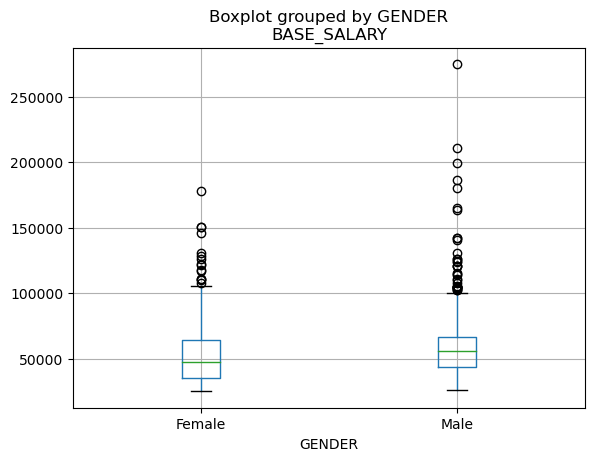

In [75]:
# Box plot by gender
df.boxplot('BASE_SALARY', by='GENDER')
plt.show()

In [51]:
# Performing t-test between male and female base salaries
ttest_result = stats.ttest_ind(df[df['GENDER'] == 'Male']['BASE_SALARY'], df[df['GENDER'] == 'Female']['BASE_SALARY'])

In [52]:
print("T-test p-value for gender pay gap:", ttest_result.pvalue)

# If p-value is less than significance level (e.g., 0.05), there's evidence of a gender pay gap.

T-test p-value for gender pay gap: nan


In [53]:
# Mean base salary by race
mean_salary_by_race = race_groups['BASE_SALARY'].mean()
print('MEAN_salary_by_race:')
print(mean_salary_by_race)

MEAN_salary_by_race:
RACE
American Indian or Alaskan Native    59862.630146
Asian/Pacific Islander               61550.166946
Black or African American            49883.155927
Hispanic/Latino                      52473.901602
Others                               51278.000000
White                                63665.200049
Name: BASE_SALARY, dtype: float64


In [54]:
# Median base salary by race
median_salary_by_race = race_groups['BASE_SALARY'].median()
print('MEDIAN_salary_by_race:')
print(median_salary_by_race)

MEDIAN_salary_by_race:
RACE
American Indian or Alaskan Native    58855.0
Asian/Pacific Islander               55461.0
Black or African American            45989.0
Hispanic/Latino                      51194.0
Others                               51278.0
White                                61921.0
Name: BASE_SALARY, dtype: float64


In [55]:
# Standard deviation of base salary by race
std_salary_by_race = race_groups['BASE_SALARY'].std()
print('STD_salary_by_race:')
print(std_salary_by_race)

STD_salary_by_race:
RACE
American Indian or Alaskan Native    21884.861244
Asian/Pacific Islander               24955.658770
Black or African American            20796.168439
Hispanic/Latino                      17776.357431
Others                               17687.569025
White                                20211.724107
Name: BASE_SALARY, dtype: float64


In [56]:
# Number of employees by gender
count_by_race = race_groups.size()
print('COUNT_BY_race:')
print(count_by_race)

COUNT_BY_race:
RACE
American Indian or Alaskan Native     11
Asian/Pacific Islander               107
Black or African American            735
Hispanic/Latino                      480
Others                                 2
White                                665
dtype: int64


<Axes: title={'center': 'BASE_SALARY'}, xlabel='RACE'>

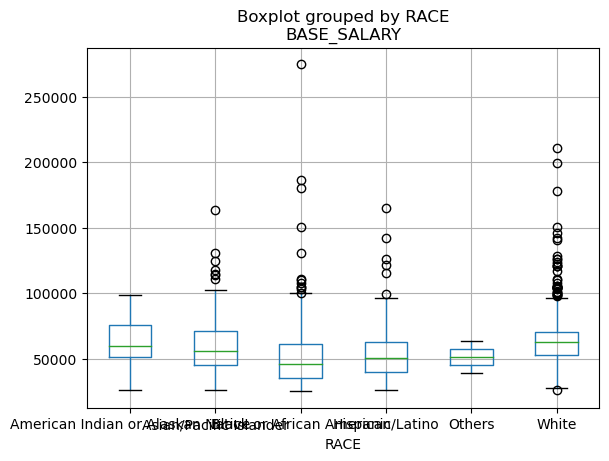

In [57]:
# Box plot by race
df.boxplot('BASE_SALARY', by='RACE')

In [58]:
# Perform ANOVA test for racial pay gap
anova_result = stats.f_oneway(*[group['BASE_SALARY'] for name, group in race_groups])
print("ANOVA p-value for racial pay gap:", anova_result.pvalue)

#If p-value is less than significance level (e.g., 0.05), there's evidence of a racial pay gap.

ANOVA p-value for racial pay gap: 1.07925114634825e-36


# Salary by Department/Position

In [61]:
 #What is the average salary within each department or position title?
#to find the average salary for each department
average_salary_by_department= df1.groupby('DEPARTMENT')['BASE_SALARY'].mean()

In [63]:
#to find the average salary for each position
average_salary_by_position= df1.groupby('POSITION_TITLE')['BASE_SALARY'].mean()

In [64]:
#display result of department average salary
print('Average Salary within each Department:')
print(average_salary_by_department)

Average Salary within each Department:
DEPARTMENT
Admn. & Regulatory Affairs         50890.551724
City Controller's Office           55711.600000
City Council                       58485.351200
Convention and Entertainment       38397.000000
Dept of Neighborhoods (DON)        47092.882353
Finance                            79650.300000
Fleet Management Department        43994.305556
General Services Department        51295.818182
Health & Human Services            51468.188422
Housing and Community Devp.        60876.811964
Houston Airport System (HAS)       53956.066038
Houston Emergency Center (HEC)     46415.739130
Houston Fire Department (HFD)      59391.750110
Houston Information Tech Svcs      76112.777778
Houston Police Department-HPD      59824.082588
Human Resources Dept.              56311.833333
Legal Department                  104959.529412
Library                            45959.238600
Mayor's Office                     86489.600000
Municipal Courts Department        538

In [65]:
#display result of position title average salary
print('Average Salary within each Position title:')
print(average_salary_by_position)

Average Salary within each Position title:
POSITION_TITLE
3-1-1 TELECOMMUNICATOR               35152.000000
3-1-1 TELECOMMUNICATOR SUPERVISOR    48755.000000
9-1-1 PSAP SUPERVISOR                66144.000000
9-1-1 PSAP SUPERVISOR-FIRE/EMS       71032.000000
9-1-1 TELECOMMUNICATOR               34335.625000
                                         ...     
UTILITY WORKER                       33235.325000
WATER SERVICE INSPECTOR I            33113.666667
WATER SERVICE INSPECTOR II           39416.000000
WEB DESIGNER                         58753.333333
WORD PROCESSOR                       31845.000000
Name: BASE_SALARY, Length: 330, dtype: float64


In [66]:
#  Are there departments or roles that offer higher salaries compared to others?
#to find the department with the highest salary
highest_avg_salary_by_department= average_salary_by_department.idxmax()

In [67]:
# to find the position or role with the highest salary
highest_avg_salary_by_position= average_salary_by_position.idxmax()

In [70]:
print(' Department with the Highest Salary:')  #to display the result
print(highest_avg_salary_by_department)


 Department with the Highest Salary:
Legal Department


In [71]:
print(' Position with the Highest Salary:')  #to display the result
print(highest_avg_salary_by_position)

 Position with the Highest Salary:
CITY ATTORNEY
